Risk and Return Models

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import risk_models, expected_returns, plotting

In [6]:
NIFTY50_TICKER=['ADANIPORTS.NS', 'ASIANPAINT.NS', 'AXISBANK.NS', 'BAJAJ-AUTO.NS', 'BAJFINANCE.NS', 'BAJAJFINSV.NS', 'BHARTIARTL.NS','BPCL.NS','BRITANNIA.NS','CIPLA.NS','COALINDIA.NS', 'DIVISLAB.NS', 'DRREDDY.NS', 'EICHERMOT.NS','GAIL.NS', 'GRASIM.NS', 'HCLTECH.NS', 'HDFC.NS', 'HDFCBANK.NS', 'HDFCLIFE.NS', 'HEROMOTOCO.NS', 'HINDALCO.NS', 'HINDUNILVR.NS', 'ICICIBANK.NS', 'INDUSINDBK.NS', 'INFY.NS', 'IOC.NS', 'ITC.NS', 'JSWSTEEL.NS', 'KOTAKBANK.NS', 'LT.NS', 'M&M.NS', 'MARUTI.NS', 'NESTLEIND.NS', 'NTPC.NS', 'ONGC.NS', 'POWERGRID.NS', 'RELIANCE.NS', 'SBIN.NS', 'SBILIFE.NS', 'SHREECEM.NS', 'SUNPHARMA.NS', 'TATAMOTORS.NS', 'TATASTEEL.NS', 'TCS.NS', 'TECHM.NS', 'TITAN.NS', 'ULTRACEMCO.NS', 'UPL.NS', 'WIPRO.NS']
df = yf.download(NIFTY50_TICKER, start="2017-01-01", end="2020-01-01")
df = df["Adj Close"]
df

[*********************100%***********************]  50 of 50 completed


,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,CIPLA.NS,...,SHREECEM.NS,SUNPHARMA.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-02,268.422485,882.538757,442.843628,2336.084473,2944.935547,862.822510,277.833588,321.354797,1342.733032,556.586121,...,14227.580078,612.863525,487.049988,355.334442,1081.838379,438.168732,325.411194,3334.976318,421.693420,173.894135
2017-01-03,268.569550,874.685486,450.261475,2354.694336,3011.828613,876.656616,271.982086,326.397156,1336.127441,564.108948,...,13846.301758,614.844971,481.100006,352.320557,1084.999390,441.356232,339.248108,3290.808105,419.356506,172.216217
2017-01-04,269.500885,884.441040,448.135010,2413.040283,2956.117920,864.657227,280.424286,328.855591,1326.893555,558.798706,...,13840.469727,616.053223,486.649994,354.198792,1090.153809,449.482086,350.454071,3265.780762,427.391510,175.387650
2017-01-05,281.853455,894.099060,453.030762,2448.326416,3013.625732,892.275757,286.856506,337.510345,1333.127197,570.205750,...,13874.085938,621.949524,502.149994,366.298096,1069.491211,438.258545,348.894989,3346.352295,431.905243,177.157745
2017-01-06,280.431915,906.781250,450.212036,2433.942383,2973.789307,871.152710,285.650421,333.571838,1346.687256,573.155884,...,14012.857422,619.339722,497.750000,366.516479,1045.209595,421.782288,346.117889,3286.900635,422.493713,173.304092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,364.570892,1791.908936,740.650024,3088.074463,9289.636719,4130.007324,455.514252,430.588776,2943.354004,477.459869,...,20177.951172,422.217102,175.500000,451.302185,2169.818848,741.425354,1195.029785,4084.472656,562.322266,250.672150
2019-12-26,359.674988,1798.019531,736.500000,3091.232666,9344.855469,4177.498535,445.948608,430.048065,2915.977783,472.921631,...,20242.804688,414.702057,174.600006,456.078369,2156.450439,739.840942,1183.517090,4049.981201,562.618652,248.734360
2019-12-27,359.724457,1800.652710,760.150024,3102.621094,9437.853516,4242.897949,453.471588,442.439423,2896.742676,479.853638,...,20413.681641,418.484161,176.149994,457.637939,2153.072266,749.252136,1182.474976,4042.853760,573.289124,246.001572


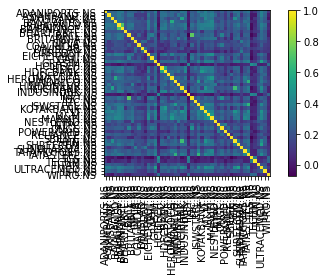

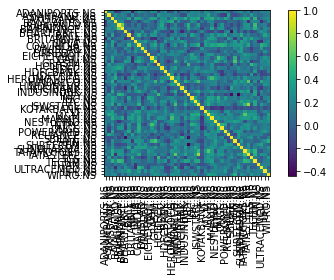

In [7]:
past_df, future_df = df.iloc[:-50], df.iloc[-50:]
future_cov = risk_models.sample_cov(future_df)

sample_cov = risk_models.sample_cov(past_df)
plotting.plot_covariance(sample_cov, plot_correlation=True, )
plotting.plot_covariance(future_cov, plot_correlation=True)
plt.show()